# EN-Methods for analyzing energy efficiency and renewable energy technologies (2024)

## Assignment 8-Renewable energy balance and techno-economic analysis


### Teachers
- Jonathan Chambers, jonathan.chambers@unige.ch
- Arven Syla, room B603, arven.syla@unige.ch
- Arbogast Nyandwi, room B603, Arbogast.Nyandwi@etu.unige.ch

### Write your students names and date in a cell below

### Subjects and objectives of this assignment
1.	Understanding consumers interest in PV and batteries
2.	Performing energy balances of renewable and storage technologies with different temporal resolutions and power flow balances (work in Python Jupyter Notebook)
3.	Perform a techno-economic analysis of a PV-coupled battery and determine key performance indicators  (work in Python Jupyter Notebook)

## Final product
The Jupyter Notebook should be converted into a pdf document and submitted into Moodle, with a total of (60 points)

### Literature
For some background literature, please check the corresponding section in Moodle

### Submission date
The report has to be submitted into Moodle on **Wednesday, 1 May 2024 at 17:00 at latest**. Any submissions later than this date, without any prior notice, would not be reviewed. Only the **pdf generated from the Notebook file** is needed.

### Debriefing
The debriefing of the assignment will take place on Friday, 3 May 2024.


## Python libraries

We first load the Python libraries that will be used during this assingment:

- **Numpy**: is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. It is similar to **Matlab**
- **Pandas**: pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is like **Excel**
- **Matplotlib**: it is a library to plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
#import numpy_financial as npf

## Exercise 1: System 1: PV system (without battery) for single house (30p)

The figure below is a schematic representation of the system 1. It corrresponds to a 4.8 kWp PV array (index “p” stands for peak ) is installed in a house in Geneva with an annual electricity demand of 3373 kWh, which corresponds to an “average” Swiss household. In addition an electric vehicle (EV) will be charged daily, resulting in 1861 kWh energy consumption per year (or translated to distance travelled is approximately to 10000 km/year). The EV profiles corresponds to an "average" charging profile.

Your will perform an energy balance and techno-economic analysis of such a system.


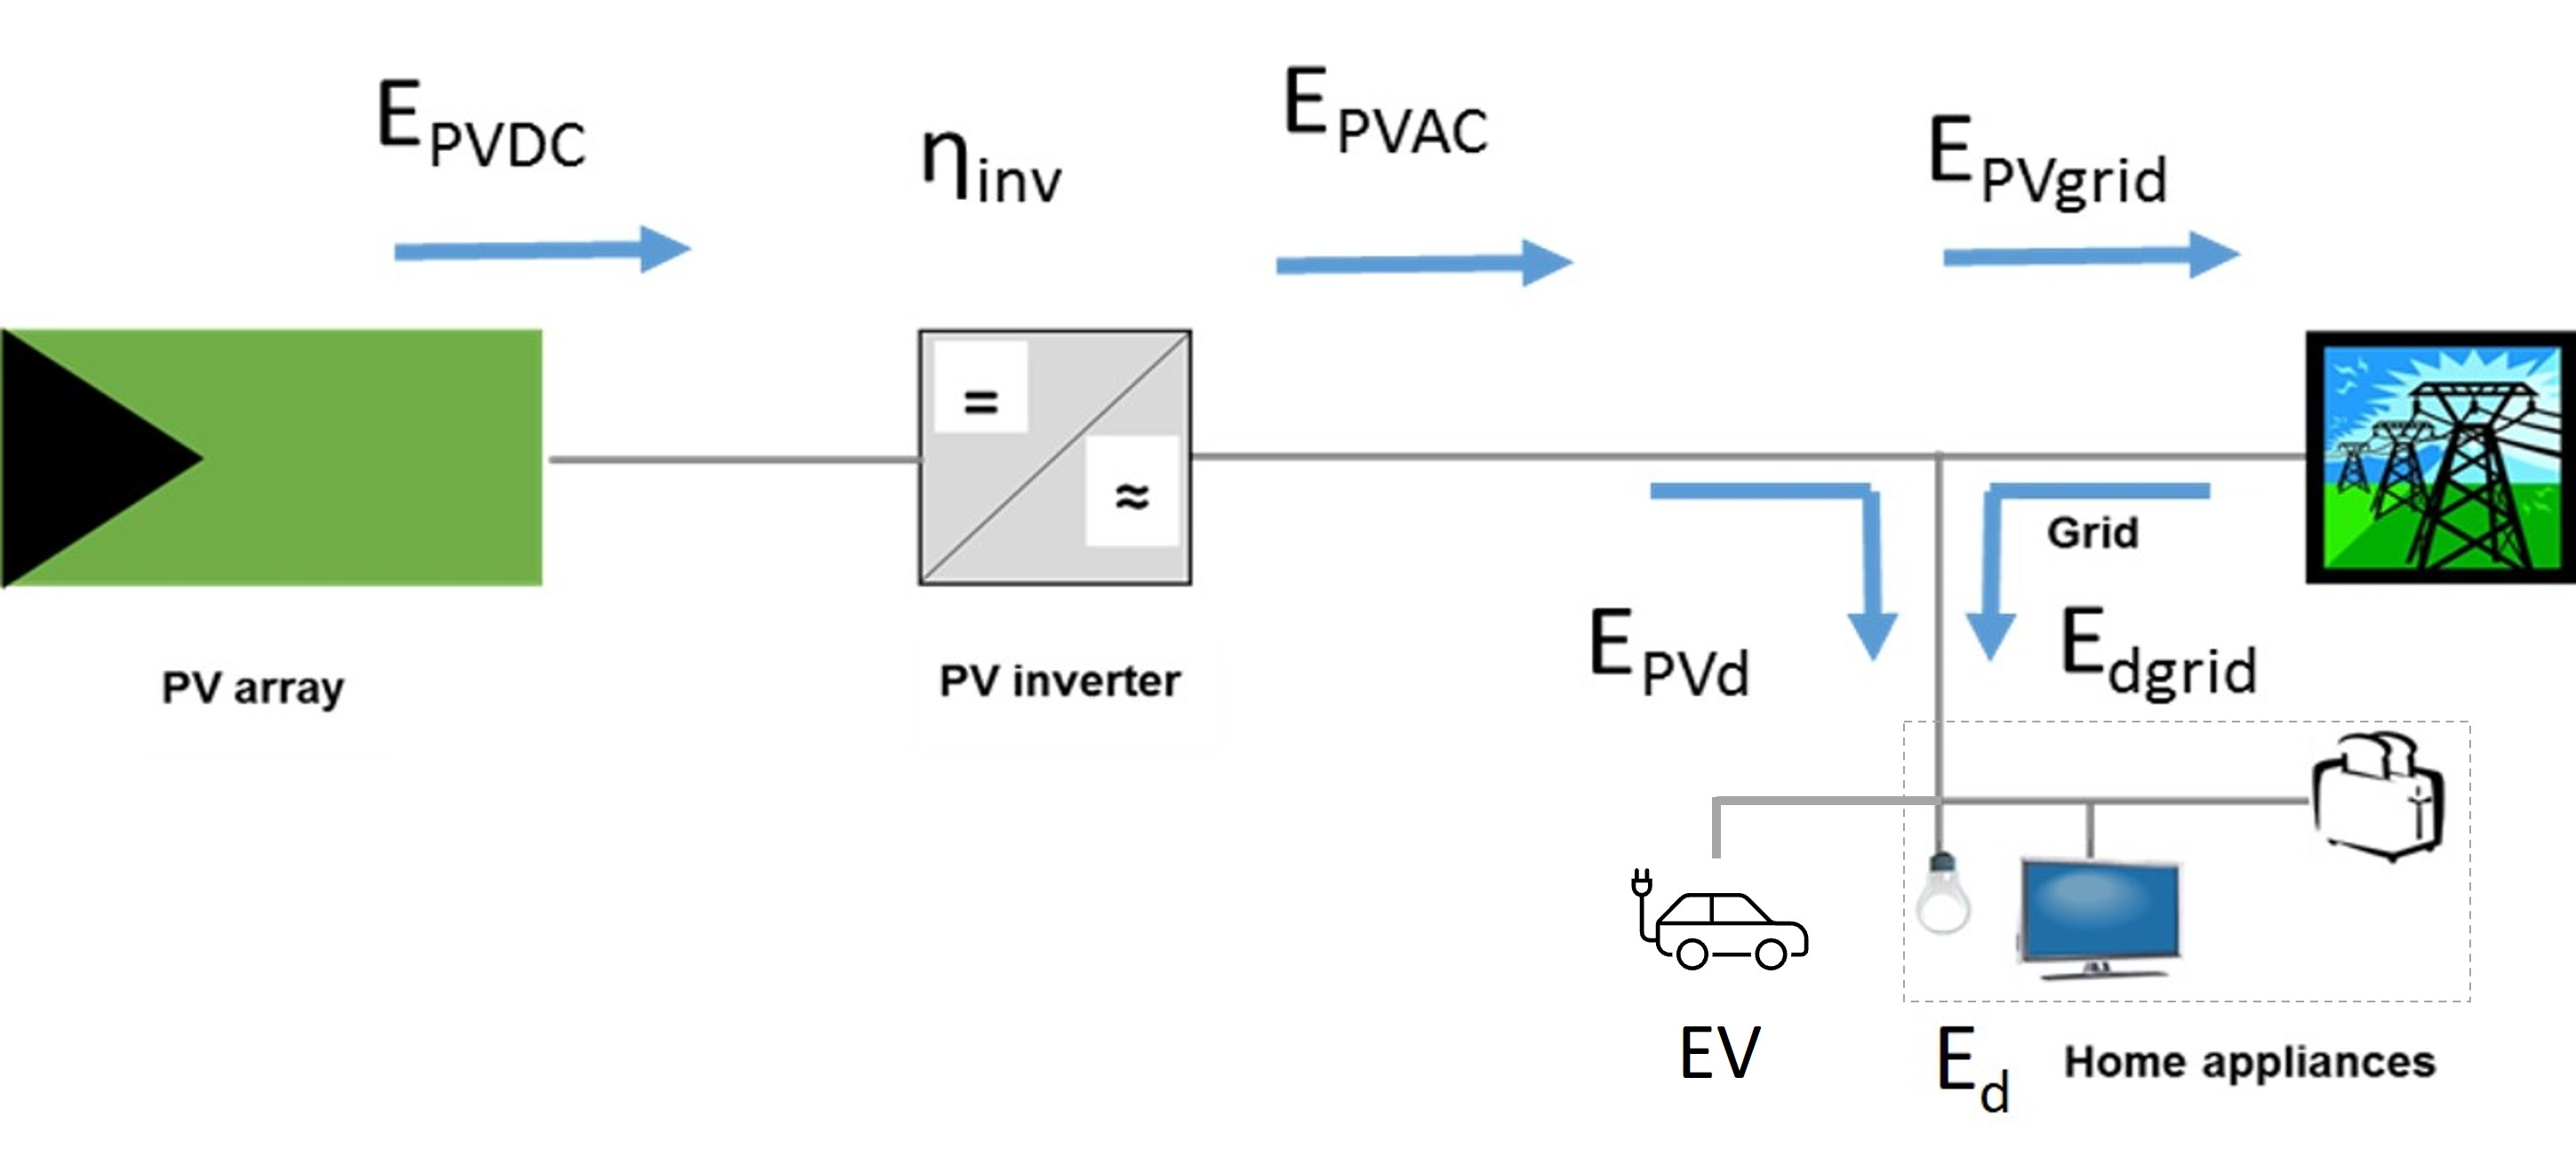


### Input data (please mind the capital letter, used for absolute cost, versus nomal letter, used for cost relative to power)

Throughout the Exercise 1, you will use the following input data:

- PV DC/AC inverter efficiency (**eta_inv**): 0,95

- Price of electricity exported/sold to the grid electricity (** P_ex**): 0,10 CHF/kWh

- Price of electricity imported from the grid (retail price, **P_i**): 0,30 CHF/kWh

- PV lifetime (**Lifetime_PV**): 30 yr

- Discount rate (**r**): 4 %

- PV system capital cost/expenditure (**capex_PV**): 3000 CHF/kW

- Inverter cost for the replacement (**capex_inv**): 400 CHF/kW

- PV nominal capacity (**Capacity_PV**): 4.8 kW

- Inverter lifetime (**Lifetime_inv**): 15 yr

In [1]:
# Input data
eta_inv=0.95
Lifetime_inv=15
P_ex=0.10
P_i=0.30
Lifetime_PV=30
r=0.04
capex_PV=3000
capex_inv=400
Capacity_PV=4.8

### 1.  Formulate an energy balance of the system 1 by writing the equations (4p)

For example, we can describe the energy production from PV that is used to meet demand as follows:

$$
E_PVd = \begin{cases} 
      E_{d total} & E_{PVAC} > E_{d total} \\
      E_{PVd} & otherwise \\
 \end{cases}
$$

Write the (simpler) equations to describe

1. The relation between the PV panel output (E_PVDC) and the PV useable energy (E_PVAC) based on the conversion efficiency (eta_inv) -1p
2. The relation between the PV production (E_PVAC), the PV self consumption (E_PVd) and the PV energy export to the grid (E_PVgrid) -1p
3. The total electricity demand E_d_total as a function of E_d, E_EV -1p
4. How the total electricity demand E_d_total is satisfied by E_PVd and E_grid  -1p
5. Explain what do you think will E_PVAC be equal to when electricity demand is higher or lower?  -1p



### 2. Using the previous energy balance, you will now perform energy balances of the PV system (without a battery). To do so, we import the following data: PV generation (in DC terms) and the electricity demand (in AC terms) from the house throughout the year with 15 min resolution, using the Excel file called "PV_Demand_Battery_EV.xlsx". Also, determine: (6p)  

- **CF** or **(annual) capacity factor** of the PV installation (using the annual PV generation in AC terms) and compare it with other traditional technologies (e.g., hydro and nuclear). - 2p
- **SC** or the percentage of PV which is self-consumed? - 1p
- **Energy exported to the grid** or **E_PVgrid** on annual basis?- 1p
- **SS** or **self-sufficiency** (in percentage)? - 1p
- **Energy imported from the grid** or **E_grid**? - 1p


#### Some tips:

- To calculate the annual values for example E_PVgrid, use the function `data['E_PVgrid'].sum()` - **You are going to need annual values for later exercises**
- Setting the value of a named column like so `data['E_PVAC'] = ...` creates new column in our current dataframe.
- Feel free to check the data using functions such as "df.head()", "df.tail()", "df.describe()".


In [ ]:
# To start with calculation first we load the data as in following:
data =  pd.read_csv('PV_Demand_Battery_EV.csv') # This line imports the input data (PV production, electricity demand, EV demand). For the moment avoid E_charDC and E_disDC columns!
data['Time'] = data['Time'].str.strip("'")
data['Time'] = pd.to_datetime(data['Time'])
print(data.head()) # This line reads the dataframe and shows header and first five lines

In [ ]:
#Fill the equations from the previous exercise to calculate the required parameters (CF, SC, SS, etc)

# PV energy production AC side
#data['E_PVAC'] =  

# Energy total demand 
#data['E_d_total'] =  

# Example for E_PVd, we need to calculate this in the middle since we need to have first E_PVAC, and after 
# we will use in the next equations
data['E_PVd'] = np.where((data['E_PVAC'] > data['E_d_total']), data['E_d_total'], data['E_PVAC'])


#data['E_PVgrid'] =
#data['E_grid'] = 

In [16]:
# Calculate the parameters required using the formulas from the lecture! 

#CF =  #Capacity Factor
#SC =  #Self-Consumption
#EtoGrid_PV =  # electricity from PV exported to the grid
#SS =  # Self-sufficiency
#EfromGrid_PV =  # electricity imported from the grid!

#print(CF)
#print(SC)
#print(ER_PV)
#print(SS)
#print(IR_PV)

### 3.	Now, we will focus the analysis on typical days, depending on the season, namely summer and winter typical day. For two seasons (summer and winter), select one day when the EV is being charged, and one day when the EV is not being charged, so you will have four days (graphs). When plotting graphs, work with power instead of energy, assuming that power is constant in the selected time scale (15 minutes), and represent (plot) these various power flows (kW) in one graph each for a winter day and a summer day. What are the main differences among seasons? What is the impact when charging EVs?  What are the main factors that can affect PV generation, electricity demand, and the other implications (such as exports, imports, SC etc)?Please discuss them. (5p)

**Select a typical day in summer**


In [11]:
# 2017-01-01 -> Year, Month, Day -> here change the months and days to select two typical day
start = pd.Timestamp('2017-07-29', tz='Europe/Brussels')
end = pd.Timestamp('2017-07-30', tz='Europe/Brussels')

In [11]:
selected_days=data.iloc[np.where((data.Time>=start) & (data.Time<end))]#check the output selected day data

**Check if the data for the selected day are selected correct**  

In [ ]:
print(selected_days) # Print the selected_days and make sure you selected the right days by checking at dates 

**Select a typical day in summer**

In [4]:
figure, axes = plt.subplots()

#Energy production from PV in AC side.
axes.plot(selected_days['Time'],selected_days['E_PVAC'], label='Energy production') 
axes.set(
    xlabel='Time',
    ylabel='Energy (kWh)'
)
plt.xticks(rotation=45)

### You can add or change the plots depending what type of insights and informations you want to write down!
# axes.plot(selected_days['Time'], selected_days['?'], label='?')
#axes.plot(selected_days['Time'], selected_days['?'], label='?')
#axes.plot(selected_days['Time'], selected_days['?'], label='?')
axes.legend()
figure.show()

NameError: name 'plt' is not defined

**Select a typical day in winter**


In [11]:
# Select a typical day (in start and end variables)
# 2017-01-01 -> Year, Month, Day -> here change the months and days to select two typical day
start = pd.Timestamp('2017-01-29', tz='Europe/Brussels')
end = pd.Timestamp('2017-01-30', tz='Europe/Brussels')

In [11]:
selected_days=data.iloc[np.where((data.Time>=start) & (data.Time<end))]#check the output selected day data

In [ ]:
print(selected_days) # Print the selected_days and make sure you selected the right days by checking at dates 

In [ ]:
figure, axes = plt.subplots()

#Energy production from PV in AC side.
axes.plot(selected_days['Time'],selected_days['E_PVAC'], label='Energy production') 
axes.set(
    xlabel='Time',
    ylabel='Energy (kWh)'
)
plt.xticks(rotation=45)

### You can add or change the plots depending what type of insights and informations you want to write down!
# axes.plot(selected_days['Time'], selected_days['?'], label='?')
#axes.plot(selected_days['Time'], selected_days['?'], label='?')
#axes.plot(selected_days['Time'], selected_days['?'], label='?')
axes.legend()
figure.show()

### 4. Please propose equations to calculate the CAPEX of the PV system (only initial investment without replacements), CAPEX_PV (CHF) considering that the investment cost of the PV system (including array, inverter, etc.) is given as a function of the power, costPV (CHF/kWp, see input data above).  Then calculate the cost for the PV system (4.8 kWp) using the input data given above. Calculate also the replacement cost for the inverter which will be used after the lifetime of the inverter (15 yr) (2p)

In [15]:
# Insert the formula for CAPEX for PV

#CAPEX_PV = 
#CAPEX_inv = 
#print(CAPEX)
#print(CAPEX_inv)

# Insert the formula for CAPEX for inverter 

#CAPEX_inv_replacement = 
#print(CAPEX_inv_replacement)

### 5.	Please propose equations to calculate the revenue (in economic terms including both electricity sold to the grid and avoided cost of electricity purchased) of the PV system, Revenue_PV (CHF), compared to the original situation in which the house only buys electricity from the grid. Please, calculate the annual revenue for the PV system (using the electricity prices given in the introduction). What is the percentage of revenue due to PV self-consumption and due to PV export to the grid? Then repeat the calculations by reducing the export costs and import costs by 5 cents/kWh. Show and interpretate the differences! (6p)

Tips: For a more powerful interpretation plot the differences before and after changes in electricity prices (e.g., bar chart in Excel)  

In [7]:
# Write the equation and calculate the Revenue_PV  
#Revenue_PV = 
#print(Revenue_PV)


# Write the equations and calculate the share of revenue due to PV export and avoided imports 
#Revenue_export = 
#Revenue_avoided_imports = 
#print(Revenue_export, Revenue_avoided_imports)

#Revenue_PV_after = 
#Revenue_export_after = 
#Revenue_avoided_imports_after =
#print(Revenue_PV_after)
#print(Revenue_export_after, Revenue_avoided_imports_after)

### 6.	Determine the levelised cost (LCOE), levelised value (LVOE) and payback period time (PBP) of the PV system assuming that the PV generation and revenue remain constant throughout the lifetime of the PV system. Consider that the inverter has a lifetime of 15 yr and a CAPEX of 400 CHF/kWp. Discuss the results and compare the LCOE with the LVOE, and the link with the PBP. How do price changes impact LCOE, LVOE, and PBP? What are the implications you observe?. Then repeat the calculations of LCOE by reducing the PV system expenditure costs by 20%.Interprate the differences!  (7p)

- What is the **LCOE**, **LVOE**, **PBP** of the PV system? - 2p
- Compare and discuss the **LCOE** ,**LVOE**, snd the link with **PBP**of this system with other power generation technologies (i.e. wind, nuclear, coal)? Where these difference might come from? - 2p 
- Which factors which are not accounted and could have the biggest impact on **LVOE** of the PV system? - 1p
- Observing **LCOE**, **LVOE** and **PBP** only, would you recommend to opt-in prosumers in an economical perspective? - 1p

In [ ]:
# Calculate LCOE
CAPEX_inv = capex_inv * Capacity_PV
CAPEX_total = CAPEX_PV + CAPEX_inv + CAPEX_inv_replacement
Energy_annual_production = data['E_PVAC'].sum()
Energy_discounted = 0
for n in range(1,Lifetime_PV+1,1):
    x = Energy_annual_production/(1+r)**n
    Energy_discounted = Energy_discounted + x

LCOE = CAPEX_total/Energy_discounted
print(LCOE, ' c/kWh')

In [ ]:
# Calculate LCOE after price changes
CAPEX_inv = capex_inv * Capacity_PV
CAPEX_total = CAPEX_PV + CAPEX_inv + CAPEX_inv_replacement
Energy_annual_production = data['E_PVAC'].sum()
Energy_discounted = 0
for n in range(1,Lifetime_PV+1,1):
    x = Energy_annual_production/(1+r)**n
    Energy_discounted = Energy_discounted + x

LCOE = CAPEX_total/Energy_discounted
print(LCOE, ' c/kWh')

In [ ]:
# Calculate LCOE after PV system expenditure changes
CAPEX_inv = capex_inv * Capacity_PV
CAPEX_total = CAPEX_PV + CAPEX_inv + CAPEX_inv_replacement
Energy_annual_production = data['E_PVAC'].sum()
Energy_discounted = 0
for n in range(1,Lifetime_PV+1,1):
    x = Energy_annual_production/(1+r)**n
    Energy_discounted = Energy_discounted + x

LCOE = CAPEX_total/Energy_discounted
print(LCOE, ' c/kWh')

In [ ]:
# Calculate LVOE
Revenue_PV = Revenue_PV
Energy_annual_production = data['E_PVAC'].sum()
Energy_discounted = 0
Revenue_PV_discounted = 0
for n in range(0,Lifetime_PV+1,1):
    x = Energy_annual_production/(1+r)**n
    Energy_discounted = Energy_discounted + x

for n in range(0,Lifetime_PV+1,1):
    x = Revenue_PV/(1+r)**n
    Revenue_PV_discounted = Revenue_PV_discounted + x
    
    
LVOE = Revenue_PV_discounted/Energy_discounted # Revenue of PV system
print(LVOE, ' c/kWh')

In [ ]:
# Calculate LVOE after price changes
Revenue_PV = Revenue_PV
Energy_annual_production = data['E_PVAC'].sum()
Energy_discounted = 0
Revenue_PV_discounted = 0
for n in range(0,Lifetime_PV+1,1):
    x = Energy_annual_production/(1+r)**n
    Energy_discounted = Energy_discounted + x

for n in range(0,Lifetime_PV+1,1):
    x = Revenue_PV/(1+r)**n
    Revenue_PV_discounted = Revenue_PV_discounted + x
    
    
LVOE = Revenue_PV_discounted/Energy_discounted # Revenue of PV system
print(LVOE, ' c/kWh')

In [ ]:
# Payback period time (PBP)

PBP =  #insert formula based on variables above
print(PBP, "years.")

In [ ]:
# Payback period time (PBP) after prices

PBP =  #insert formula based on variables above
print(PBP, "years.")

# ------------------------------------------------------------------------------------------------

# Exercise 2-System 2: PV-coupled battery system for single house (30 point)


The figure below is a schematic representation of the System 2. It corrresponds to a PV-coupled battery system to increase PV self-consumption. We assume a DC-coupled topologoy with a DC-DC converter efficiency of 100% and DC/AC inverter efficiency as in the Exercise 1.



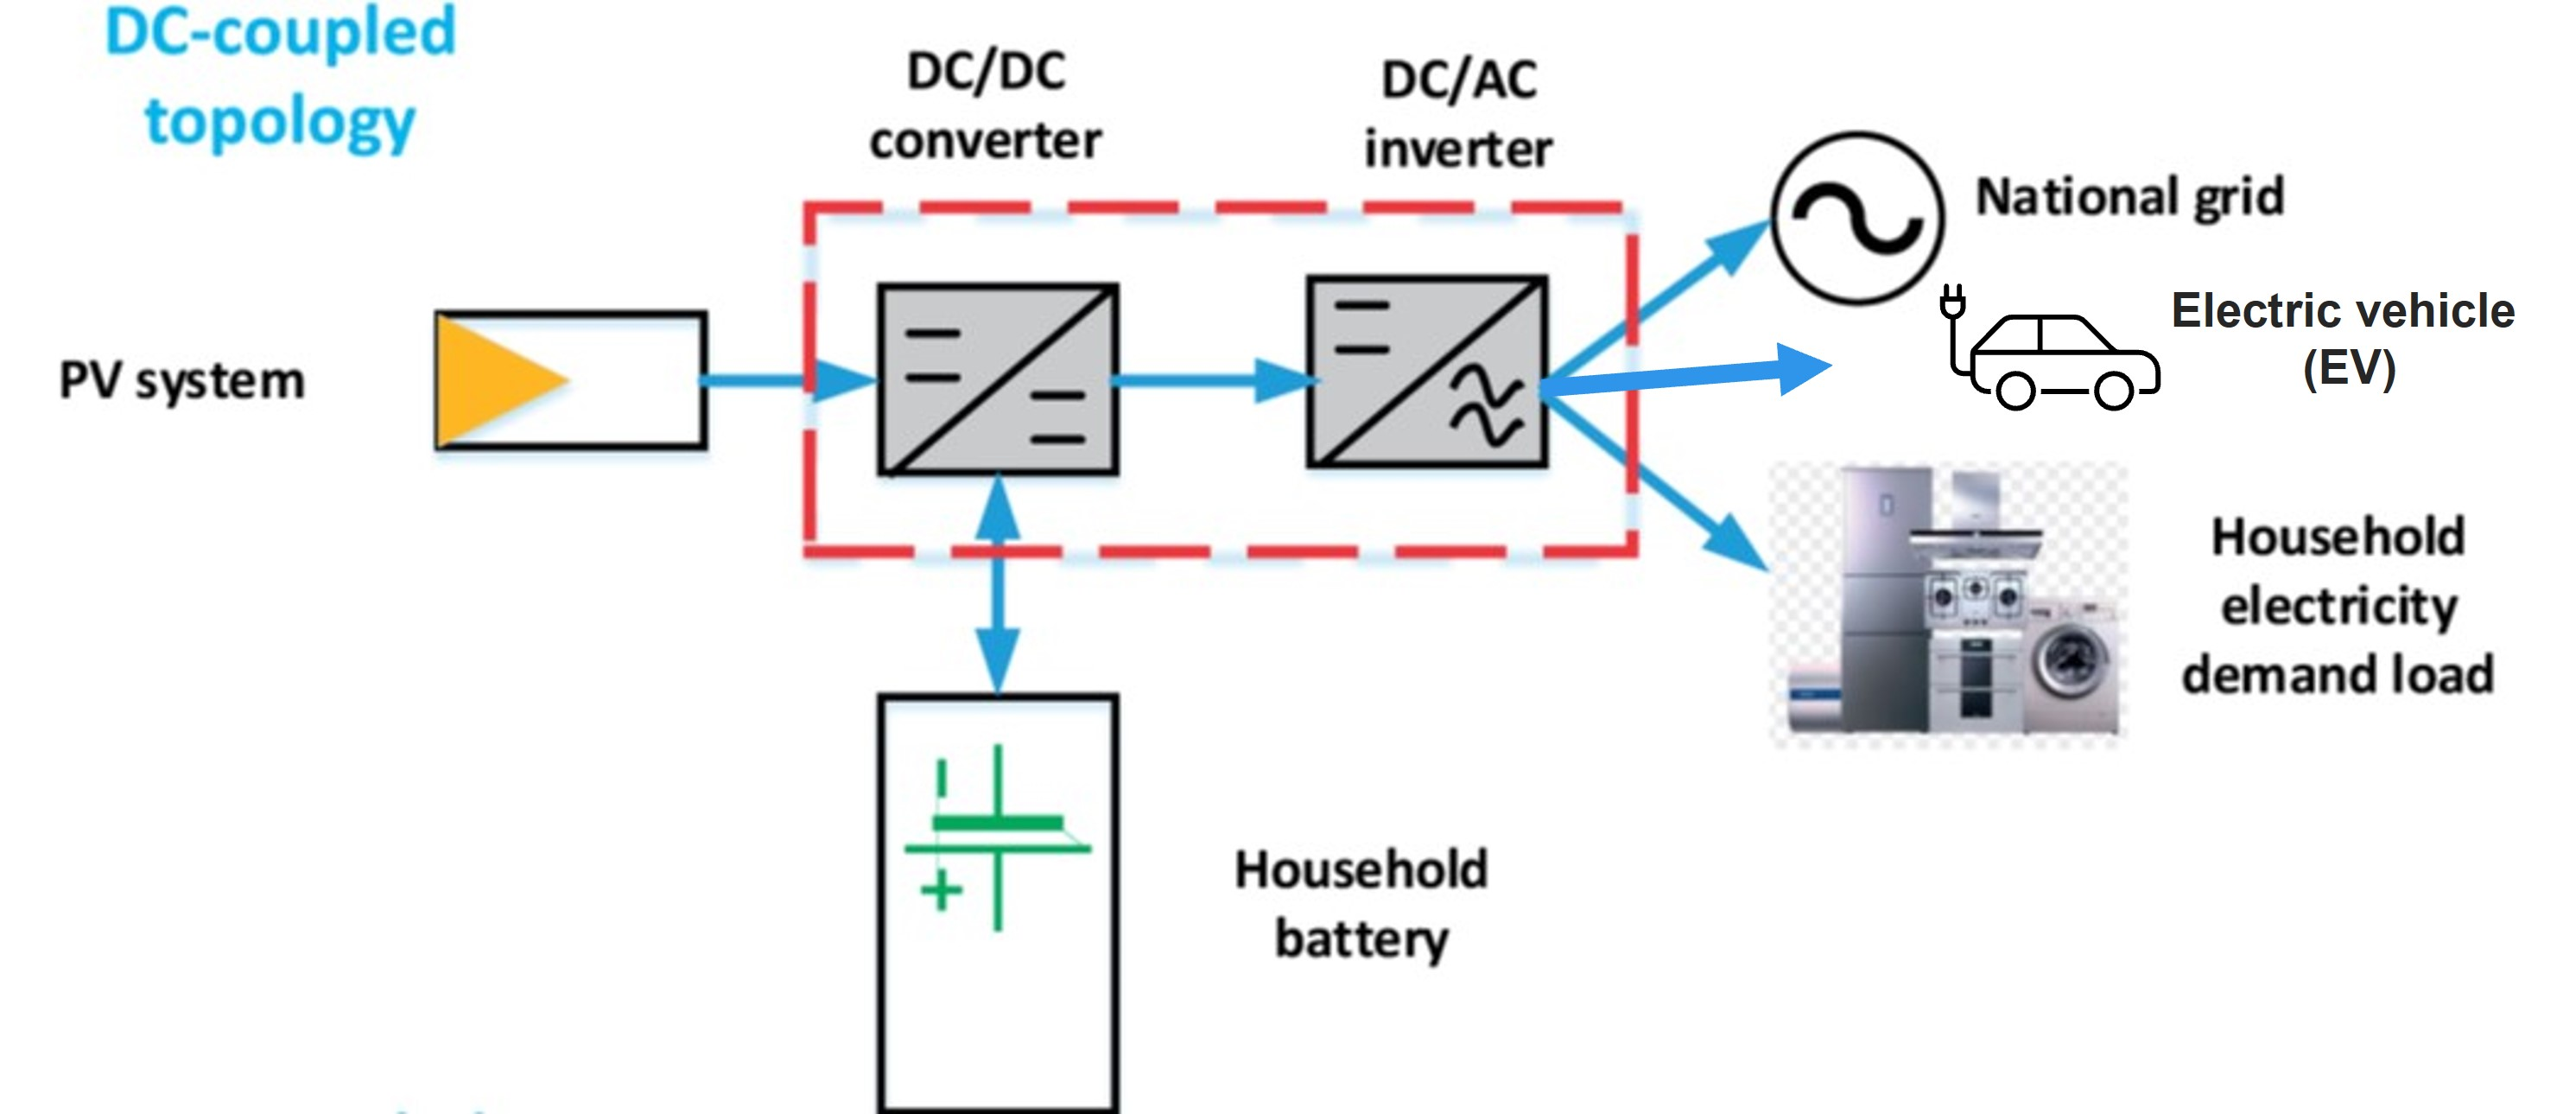

### Input data

Throughout the Exercise 2, you will use the following input data:


- Battery capacity in energy terms (**Capacity_E_bat**): 7 kWh

- Battery power rating (** Capacity_P_bat**): 2.8 kW

- Storage medium cost (retail price, **capex_bat**): 350 CHF/kWh

- Balance of the plant cost (**capex_BoP**): 2000 CHF/kW

- Other needed parameters, e.g., discount factor, are equal to exercise 1.



In [7]:
Lifetime_bat = 15
Capacity_E_bat = 7
Capacity_P_bat = 2.8
capex_bat = 350
capex_BoP = 2200
eta_conv = 1

### 7.	Please formulate an energy balance of the System 2 by writing the equations which: (2p) 

- How PV electricity generation is used (include: E_PVDC, E_PVAC, eta_inv, E_charDC, eta_conv) – 1p
- How electricity demand is satisfied (include: E_grid, E_PVd, eta_inv, E_disDC, eta_conv) – 1p

**Tip** - Since we are using a  DC topology of the PV-coupled battery system, we should convert the parameters (PV and battery) in from DC to AC terms, using both the converter and inverter efficiencies when needed. Also, include an equation for the round trip efficiency of the battery system. Following the notation used in exercise 1, please refer to the electricity supplied from the PV to the battery as E_PVbat (kWh) and so on (2 points).

### 8.	Using the previous energy balance, please determine the values of the following parameters using the battery charge (kWh) and discharge (kWh) data of a 7 kWh battery  together with the energy balance of the System 1 (resolved for the exercise 1): (5p)

1. PV energy export to the grid, **E_PVgrid** (kWh) per year; electricity imports (or purchased) by the house - **E_grid** (kWh) per year; Annual round trip efficiency or **eta_bat**; Self-consumption (**SC**); Self-sufficiency (**SS**) and total number of equivalent full cycles (**EFC**) - 3p

2. Please discuss the difference with the first exercise (question 2) for the system without battery. - 2p

**Comment**: The battery charge (kWh) and discharge (kWh) data are in DC terms (at the battery level) in the Excel file. You have to convert them to AC (see the Figure. 2).


- We assume that  inside the DC-coupled topology, the converter efficiency (DC to DC) is equal to 1.


In [ ]:
#The following code copies the dataframe from above and print it out!
data_battery=data.copy()
print(data_battery)

In [19]:
# Since we include stationary battery storage the energy flows will change (imports, exports). Therefore we set them to zero and re-calculate.
data_battery['E_PVd'] = 0
data_battery['E_PVgrid'] = 0
data_battery['E_grid'] = 0

In [ ]:
#Fill the equations from the previous exercise to calculate the required parameters (CF, SC, SS, etc)
    
data_battery['E_PVd'] = np.where((data_battery['E_PVAC'] + (data_battery['E_disDC']-data_battery['E_charDC'])*eta_inv > data_battery['E_d_total']), data_battery['E_d_total'], data_battery['E_PVAC']+(data_battery['E_disDC'] - data_battery['E_charDC'])*eta_inv)
#data_battery['E_PVgrid'] = 
#data_battery['E_grid'] =

In [17]:
## Run this cell to calculate the parameters for battery!

#SC_battery =  #Self-Consumption
#EtoGrid_battery =  # Share of electricity from PV exported to the grid
#SS_battery =  # Self-sufficiency
#EfromGrid_PV_battery =  # Share of electricity imported from the grid!
#eta_bat=

#print(EtoGrid_battery)
#print(EfromGrid_battery)
#print(eta_bat)
#print(SC_battery)
#print(SS_battery)

### 9. Now, again we will focus on the same two represenative days as in the first exercise, namely a sunny and winter day, and work with power instead of energy assuming that power is constant in the selected time scale (15 minute) and represent these various power flows (kW) in one graph each for the winter day and the summer day. To do so, we randomly pick two days in the calendar using the variables start and end. (6p)

- Plot the four graphs for representative days? - 3p
- Discuss the main differences among the two days (production, consumption, imports/export etc)? Also the differences of battery charging and discharging? What is the impact of battery when compared without battery (from the first part of exercise)  - 3p

**Tip**: Plot lines in graphs, based on what you think should be relevant to explain the addressed questions, by substituting **"??"** in the code below with the name of variables!

**Select a winter day**

In [11]:
# Select a typical day (in start and end variables)
# 2017-01-01 -> Year, Month, Day
start = pd.Timestamp('2017-12-21', tz='Europe/Brussels')
end = pd.Timestamp('2017-12-22', tz='Europe/Brussels')

In [12]:
selected_days_battery=data_battery.iloc[np.where((data_battery.Time>=start) & (data_battery.Time<end))]#check the output selected day data

In [ ]:
figure, axes = plt.subplots()

#Energy production from PV in AC side.
axes.plot(selected_days_battery['Time'],selected_days_battery['E_d_total'], label='Electricity consumption') 
axes.set(
    xlabel='Time',
    ylabel='Energy (kWh)'
)
plt.xticks(rotation=45)

### You can add or change the plots depending what type of insights and informations you want to write down!
# axes.plot(selected_days_battery['Time'], selected_days_battery['?'], label='?')
#axes.plot(selected_days_battery['Time'], selected_days_battery['?'], label='?')
#axes.plot(selected_days_battery['Time'], selected_days_battery['?'], label='?')
axes.legend()
figure.show()

**Select a summer day**

In [ ]:
# Select a typical day (in start and end variables)
# 2017-01-01 -> Year, Month, Day
start = pd.Timestamp('2017-06-21', tz='Europe/Brussels')
end = pd.Timestamp('2017-06-22', tz='Europe/Brussels')

In [ ]:
selected_days_battery=data_battery.iloc[np.where((data_battery.Time>=start) & (data_battery.Time<end))]#check the output selected day data

In [ ]:
figure, axes = plt.subplots()

#Energy production from PV in AC side.
axes.plot(selected_days_battery['Time'],selected_days_battery['E_d_total'], label='Electricity consumption') 
axes.set(
    xlabel='Time',
    ylabel='Energy (kWh)'
)
plt.xticks(rotation=45)

### You can add or change the plots depending what type of insights and informations you want to write down!
# axes.plot(selected_days_battery['Time'], selected_days_battery['?'], label='?')
#axes.plot(selected_days_battery['Time'], selected_days_battery['?'], label='?')
#axes.plot(selected_days_battery['Time'], selected_days_battery['?'], label='?')
axes.legend()
figure.show()

### 10.	Please propose equations to calculate the CAPEX of the battery system including its energy component (storage medium, costs CHF/kWh) and power component (battery inverter balance-of-plant (BoP), CHF/kWh).  Then, calculate the total cost for the battery system, CAPEX_bat (CHF), using the input data given below and assuming that the battery system has a power rating of 2.8 kW. (2p)




In [19]:
#CAPEX_bat= 
#print(CAPEX_bat)

### 11.	Please propose equations to calculate the revenue (in economic terms) of the battery system, Rev_bat (CHF/year), compared to the case of having the PV system only. As electricity price nomenclature, use Pep (CHF/kWh) and Pes (CHF/kWh) for the purchase price of electricity and the selling price of electricity. Include also price changes (before and after)! (6p)

- Formulate and calculate the annual revenue of the battery system. Do not forget to include avoided imports and exports - 2p 
- Please discuss the main parameters affecting the economic revenue drawn from the battery. - 2p
- Discuss the implications of price changes (before prices (given at introduction) and after prices(exercise 5 and 6))! - 2p

In [20]:
# Rev_bat= 
# print(Rev_bat)

# Rev_bat_after= 
# print(Rev_bat_after)

### 12.	 Answer the following questions related to economic viability of the battery: (7p)

* Determine the levelised cost (LCOES), levelised value (LVOES) and payback period (PBP) of the battery system assuming that the battery discharge and the revenue remain constant throughout the battery’s lifetime before and after the price changes. - 3p
* Discuss the factors that are not accounted but could influence the LVOE -2p
* Considering economic criteria, shall a prosumer invest in a battery under these assumptions? - 2p


In [ ]:
# Calculate LCOE for battery
CAPEX_bat=(capex_bat*Capacity_E_bat) + (Capacity_P_bat*capex_BoP)
Energy_annual_production = data_battery['E_disDC'].sum()
Energy_discounted = 0
for n in range(1,Lifetime_bat+1,1):
    x = Energy_annual_production/(1+r)**n
    Energy_discounted = Energy_discounted + x

LCOE = CAPEX_bat/Energy_discounted
print(LCOE)

In [ ]:
# Calculate LCOE for battery after prices changes
CAPEX_bat=(capex_bat*Capacity_E_bat) + (Capacity_P_bat*capex_BoP)
Energy_annual_production = data_battery['E_disDC'].sum()
Energy_discounted = 0
for n in range(1,Lifetime_bat+1,1):
    x = Energy_annual_production/(1+r)**n
    Energy_discounted = Energy_discounted + x

LCOE = CAPEX_bat/Energy_discounted
print(LCOE)

In [ ]:
# Calculate LVOE for battery
Revenue_battery = Rev_bat
Energy_annual_production = data_battery['E_disDC'].sum()
Energy_discounted = 0
Revenue_battery_discounted = 0

for n in range(0,Lifetime_bat+1,1):
    x = Energy_annual_production/(1+r)**n
    Energy_discounted = Energy_discounted + x

for n in range(0,Lifetime_bat+1,1):
    x = Revenue_battery/(1+r)**n
    Revenue_battery_discounted = Revenue_battery_discounted + x
        
LVOE = Revenue_battery_discounted.sum()/Energy_discounted.sum() # Revenue of PV system
print(LVOE)

In [ ]:
# Calculate LVOE for battery after price changes
Revenue_battery = Rev_bat
Energy_annual_production = data_battery['E_disDC'].sum()
Energy_discounted = 0
Revenue_battery_discounted = 0

for n in range(0,Lifetime_bat+1,1):
    x = Energy_annual_production/(1+r)**n
    Energy_discounted = Energy_discounted + x

for n in range(0,Lifetime_bat+1,1):
    x = Revenue_battery/(1+r)**n
    Revenue_battery_discounted = Revenue_battery_discounted + x
        
LVOE = Revenue_battery_discounted.sum()/Energy_discounted.sum() # Revenue of PV system
print(LVOE)

In [ ]:
# Calculate Pay Back Period (PBP)

#PBP = 
#print(PBP)

In [ ]:
# Calculate Pay Back Period (PBP) after price changes

#PBP = 
#print(PBP)

### 13.	How can we increase/improve self-sufficiency and self-consumption apart a battery (suggest at least 2 example)? (1p)


## 14.	What evolution of parameters influencing economic viability of PV-coupled battery systems do you expect for the next 10-15 years? How would this affect the business case of PV-coupled battery systems in single houses? (2p)  

**Tip** - You can use the bibliography given in Model to write your answer. 

### To generate a pdf, use "file", "download as", "pdf via Latex"